In [2]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
import sys
from astropy.io import fits 
import astropy.convolution as apconv
import pyflct
from matplotlib.colors import Normalize
import matplotlib.cm as cm

In [3]:
# Loading Ivan's data

cube = fits.open("SSD_25_8Mm_16_pdmp_1_I_500.fits")[0].data
np.shape(cube) # checking shape

(361, 768, 768)

In [4]:
# Taking out a few slices
cube = cube[:99,:,:]
np.shape(cube)

(99, 768, 768)

In [5]:
# Defining FWHM, delta_t and pixelsize
FWHM = 200 # km
delta_t = 60 # s
pixelsize = 32 # km
sigma = FWHM/1.665/pixelsize
print(sigma)

3.7537537537537538


In [6]:
Vel_x_I = []
Vel_y_I = []
Vm_I = []
for j in range(1, len(cube)):
    vel_x, vel_y, vm = pyflct.flct(cube[j-1], cube[j], delta_t, pixelsize, sigma)
    Vel_x_I.append(vel_x)
    Vel_y_I.append(vel_y)
    Vm_I.append(vm)

Vel_x_I = np.asarray(Vel_x_I)
Vel_y_I = np.asarray(Vel_y_I)
Vm_I = np.asarray(Vm_I)

flct: nominal sliding box size = 12
flct: mean value of gamma^2/sigma^2 = 0.381313

flct: finished
flct: nominal sliding box size = 12
flct: mean value of gamma^2/sigma^2 = 0.381159

flct: finished
flct: nominal sliding box size = 12
flct: mean value of gamma^2/sigma^2 = 0.381181 = 59 out of 767

flct: finished
flct: nominal sliding box size = 12
flct: mean value of gamma^2/sigma^2 = 0.380962

flct: finished
flct: nominal sliding box size = 12
flct: mean value of gamma^2/sigma^2 = 0.380849

flct: finished
flct: nominal sliding box size = 12
flct: mean value of gamma^2/sigma^2 = 0.380868

flct: finished
flct: nominal sliding box size = 12
flct: mean value of gamma^2/sigma^2 = 0.381085

flct: finished
flct: nominal sliding box size = 12
flct: mean value of gamma^2/sigma^2 = 0.381275

flct: finished
flct: nominal sliding box size = 12
flct: mean value of gamma^2/sigma^2 = 0.381345

flct: finished
flct: nominal sliding box size = 12
flct: mean value of gamma^2/sigma^2 = 0.381554 = 59 out o

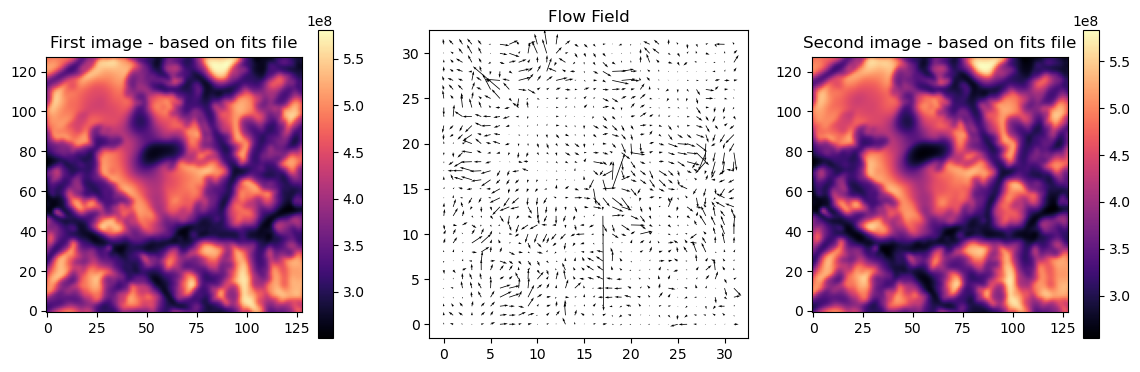

In [7]:
# Trying out intensity as windowing parameter

image1 = cube[0]
image2 = cube[1]
i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted - prvi pokusaj
X = np.arange(0, 32, 1)
Y = np.arange(0, 32, 1)
U, V = np.meshgrid(X, Y)

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
ax1.set_xlabel = ("X pixel")
ax1.set_ylabel = ("Y pixel")
plt.imshow(image1[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
plt.colorbar()
ax1.set_title("First image - based on fits file")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vel_x_I[0,i_start:i_end:4, j_start:j_end:4], Vel_y_I[0,i_start:i_end:4, j_start:j_end:4])
ax2.set_title("Flow Field") #FLCT

# Plot the shifted image
ax3 = fig.add_subplot(133)
ax3.set_xlabel = ("X pixel")
ax3.set_ylabel = ("Y pixel")
plt.imshow(image2[i_start:i_end, j_start:j_end], origin="lower", cmap='magma')
ax3.set_title("Second image - based on fits file")
plt.colorbar()

In [8]:
test_range = 99
Vx = fits.open("ISSI_2D_Tau=1.0-" + str(test_range) + "slices.fits")[2].data
Vy = fits.open("ISSI_2D_Tau=1.0-" + str(test_range) + "slices.fits")[3].data
Vx = Vx[:2]
Vy = Vy[:2]

In [9]:
Vx_mean = []
Vy_mean = []
for j in range(1, len(Vx)):
    vx = (Vx[j-1] + Vx[j])/2/1e5
    Vx_mean.append(vx)
    vy = (Vy[j-1] + Vy[j])/2/1e5
    Vy_mean.append(vy)

# Averaged, i.e mean Vx and Vy
Vx_mean = []
Vy_mean = []
for j in range(1, len(Vx)):
    vx = (Vx[j-1] + Vx[j])/2/1e5
    Vx_mean.append(vx)
    vy = (Vy[j-1] + Vy[j])/2/1e5
    Vy_mean.append(vy)

Vx_mean = np.asarray(Vx_mean)
Vy_mean = np.asarray(Vy_mean)

Text(0.5, 1.0, 'Flow Field - FLCT; continuum intensity windowing parameter')

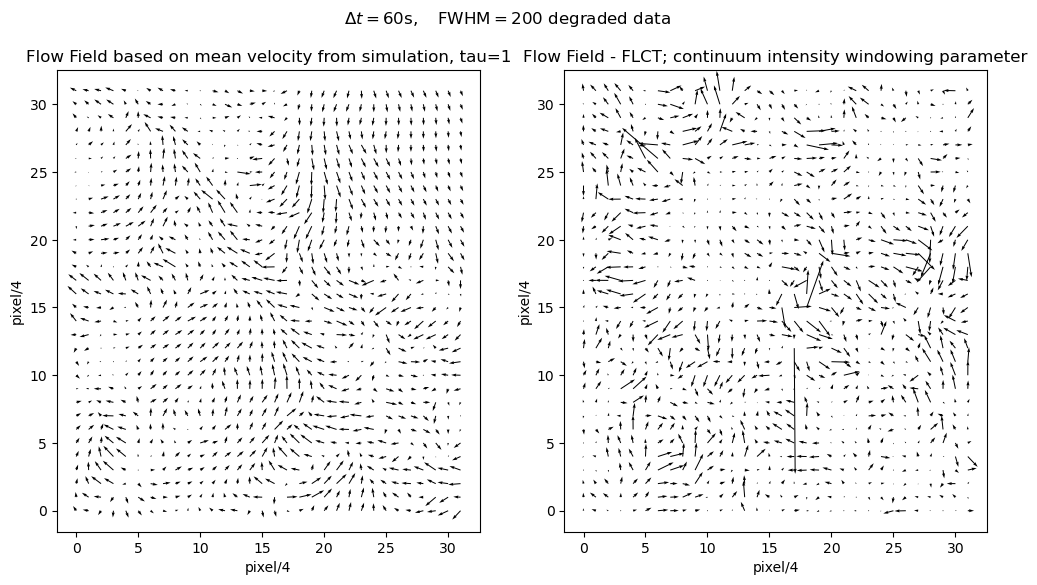

In [10]:
i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted 
X = np.arange(0, 32, 1)
Y = np.arange(0, 32, 1)
U, V = np.meshgrid(X, Y)


# Plotting the first image
fig = plt.figure(figsize=(12, 6))
fig.suptitle(r'$\Delta t=60\mathrm{s}, \quad \mathrm{FWHM}=200$' + " degraded data")
ax1 = fig.add_subplot(121)
ax1.set_xlabel("pixel/4")
ax1.set_ylabel("pixel/4")
ax1.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_mean[0,i_start:i_end:4, j_start:j_end:4], Vy_mean[0,i_start:i_end:4, j_start:j_end:4])
ax1.set_title("Flow Field based on mean velocity from simulation, tau=1") 

ax2 = fig.add_subplot(122)
ax2.set_xlabel("pixel/4")
ax2.set_ylabel("pixel/4")
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
          Vel_x_I[0,i_start:i_end:4, j_start:j_end:4], Vel_y_I[0,i_start:i_end:4, j_start:j_end:4])
ax2.set_title("Flow Field - FLCT; continuum intensity windowing parameter") 

In [11]:
cube = fits.open("SSD_25_8Mm_16_pdmp_1_I_500.fits")[0].data
np.shape(cube) # checking shape

# Taking out a few slices
cube = cube[:99,:,:]
cube = cube[::3]
np.shape(cube)

(33, 768, 768)

In [12]:
# Defining FWHM, delta_t and pixelsize
FWHM = 200 # km
delta_t = 60 # s
pixelsize = 32 # km
sigma = FWHM/1.665/pixelsize
print(sigma)

3.7537537537537538


In [13]:
Vel_x_I = []
Vel_y_I = []
Vm_I = []
for j in range(1, len(cube)):
    vel_x, vel_y, vm = pyflct.flct(cube[j-1], cube[j], delta_t, pixelsize, sigma)
    Vel_x_I.append(vel_x)
    Vel_y_I.append(vel_y)
    Vm_I.append(vm)

Vel_x_I = np.asarray(Vel_x_I)
Vel_y_I = np.asarray(Vel_y_I)
Vm_I = np.asarray(Vm_I)

flct: nominal sliding box size = 12
flct: mean value of gamma^2/sigma^2 = 0.408285

flct: finished
flct: nominal sliding box size = 12
flct: mean value of gamma^2/sigma^2 = 0.407863

flct: finished
flct: nominal sliding box size = 12
flct: mean value of gamma^2/sigma^2 = 0.40824767

flct: finished
flct: nominal sliding box size = 12
flct: mean value of gamma^2/sigma^2 = 0.408665

flct: finished
flct: nominal sliding box size = 12
flct: mean value of gamma^2/sigma^2 = 0.408415

flct: finished
flct: nominal sliding box size = 12
flct: mean value of gamma^2/sigma^2 = 0.408558

flct: finished
flct: nominal sliding box size = 12
flct: mean value of gamma^2/sigma^2 = 0.409535

flct: finished
flct: nominal sliding box size = 12
flct: mean value of gamma^2/sigma^2 = 0.410181

flct: finished
flct: nominal sliding box size = 12
flct: mean value of gamma^2/sigma^2 = 0.409635

flct: finished
flct: nominal sliding box size = 12
flct: mean value of gamma^2/sigma^2 = 0.408621 = 59 out of 767

flct: f

In [14]:
test_range = 99
Vx = fits.open("ISSI_2D_Tau=1.0-" + str(test_range) + "slices.fits")[2].data
Vy = fits.open("ISSI_2D_Tau=1.0-" + str(test_range) + "slices.fits")[3].data
Vx = Vx[::3]
Vy = Vy[::3]

In [15]:
# Averaged, i.e mean Vx and Vy
Vx_mean = []
Vy_mean = []
for j in range(1, len(Vx)):
    vx = (Vx[j-1] + Vx[j])/2/1e5
    Vx_mean.append(vx)
    vy = (Vy[j-1] + Vy[j])/2/1e5
    Vy_mean.append(vy)

Vx_mean = np.asarray(Vx_mean)
Vy_mean = np.asarray(Vy_mean)

Text(0.5, 1.0, 'Flow Field - FLCT; continuum intensity windowing parameter')

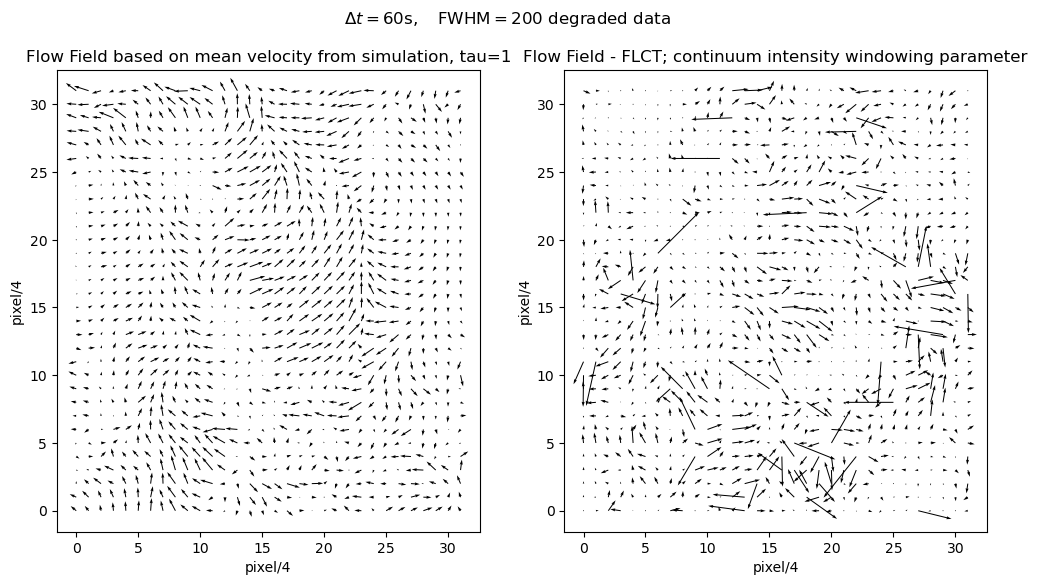

In [17]:
i_start = 0
j_start = 0
i_end = 128
j_end = 128
# But first we need to create a meshgrid on which the flow field will be plotted 
X = np.arange(0, 32, 1)
Y = np.arange(0, 32, 1)
U, V = np.meshgrid(X, Y)


# Plotting the first image
fig = plt.figure(figsize=(12, 6))
fig.suptitle(r'$\Delta t=60\mathrm{s}, \quad \mathrm{FWHM}=200$' + " degraded data")
ax1 = fig.add_subplot(121)
ax1.set_xlabel("pixel/4")
ax1.set_ylabel("pixel/4")
ax1.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           Vx_mean[5,i_start:i_end:4, j_start:j_end:4], Vy_mean[5,i_start:i_end:4, j_start:j_end:4])
ax1.set_title("Flow Field based on mean velocity from simulation, tau=1") 

ax2 = fig.add_subplot(122)
ax2.set_xlabel("pixel/4")
ax2.set_ylabel("pixel/4")
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
          Vel_x_I[15,i_start:i_end:4, j_start:j_end:4], Vel_y_I[15,i_start:i_end:4, j_start:j_end:4])
ax2.set_title("Flow Field - FLCT; continuum intensity windowing parameter") 